In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# import seaborn as sns

plt.xkcd()
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["font.family"] = "Comic Neue"

pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 3)

In [18]:
dfw_2011 = pd.read_csv("dfw_2011.csv")

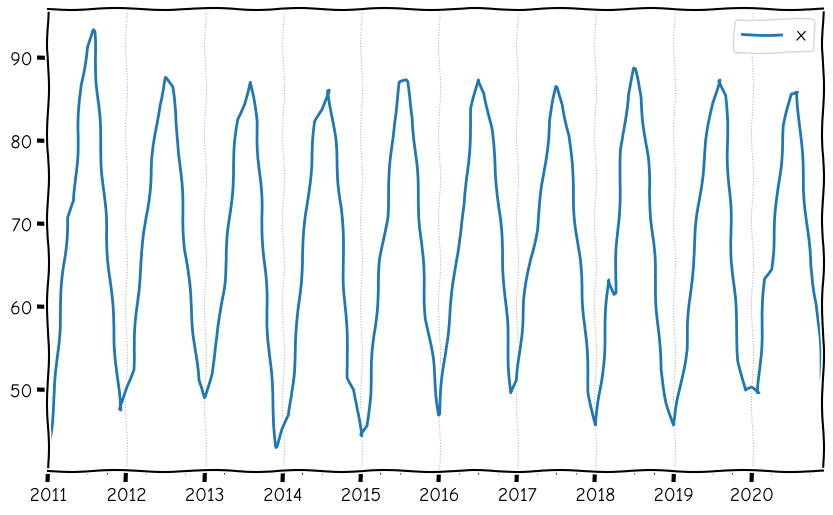

In [19]:
dti = pd.date_range("2011", "2021", freq="M")
dfw_2011.index = dti
ax = dfw_2011.plot()
ax.grid(True, axis="x", linestyle='dotted',linewidth=0.75)

In [20]:
# type(dfw_2011.index)
dfw_2011.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2011-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [21]:
bitcoin = pd.read_csv("bitcoin.csv", parse_dates=['Date'], index_col="Date")

In [22]:
# type(bitcoin.index)
bitcoin.index.name = None
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 2020-01-01 to 2021-04-05
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  457 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [23]:
s = bitcoin.squeeze()
s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 461 entries, 2020-01-01 to 2021-04-05
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
457 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [24]:
s

2020-01-01     7200.174
2020-01-02     6985.470
2020-01-03     7344.884
2020-01-04     7410.657
2020-01-05     7411.317
                ...    
2021-04-01    59095.809
2021-04-02    59384.312
2021-04-03    57603.891
2021-04-04    58758.555
2021-04-05    59057.879
Name: Adj Close, Length: 461, dtype: float64

In [25]:
bitcoin["Adj Close"].isnull().sum()

4

In [26]:
bitcoin["Adj Close"][bitcoin["Adj Close"].isnull()]

2020-04-17   NaN
2020-10-09   NaN
2020-10-12   NaN
2020-10-13   NaN
Name: Adj Close, dtype: float64

In [27]:
bit_coin = pd.read_csv("BTC-USD.csv", parse_dates=['Date'], index_col="Date")
bit_coin["Adj Close"].isnull().sum()


0

In [28]:
NYCabRaw = pd.read_csv("data_reports_monthly.csv") #, parse_dates=['Date'], index_col="Date")
NYCabRaw

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2022-12,Green,"2,336","45,208",965,942,496,16.3,3.6,16.1,3.5,15.9,66%,-
1,2022-12,Yellow,"109,290","2,358,924","10,749","7,791","6,529",26.0,8.7,22.0,7.5,16.9,79%,-
2,2022-12,FHV - High Volume,"634,379",-,"78,091","74,877","52,087",21.6,6.6,21.1,6.4,19,-,"10,672"
3,2022-11,FHV - Black Car,"16,695",-,"7,175","7,146","3,119",13.1,4.2,13.1,4.2,30,-,-
4,2022-11,FHV - Livery,"17,336",-,"4,164","3,988","2,601",19.6,4.9,19.2,4.8,20,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,2010-05,Yellow,"499,374","5,561,218","30,950","13,309","12,729",29.6,14.8,22.7,8.3,-,35%,-
646,2010-04,Yellow,"504,798","5,502,545","30,827","13,326","12,856",28.9,14.8,22.3,8.3,-,35%,-
647,2010-03,Yellow,"415,567","3,011,750","28,709","12,183","10,382",26.4,15.1,20.4,8.3,11.5,35%,-
648,2010-02,Yellow,"397,969","3,392,416","28,255","12,171","10,045",23.1,14.6,17.6,8.3,11.1,35%,-


In [29]:
NYCabRaw.columns

Index(['Month/Year', 'License Class',
       '               Trips Per Day               ',
       '               Farebox Per Day               ',
       '                Unique Drivers                ',
       '                Unique Vehicles                ',
       '                Vehicles Per Day                ',
       '           Avg Days Vehicles on Road           ',
       '           Avg Hours Per Day Per Vehicle           ',
       '           Avg Days Drivers on Road           ',
       '           Avg Hours Per Day Per Driver           ',
       '           Avg Minutes Per Trip           ',
       'Percent of Trips Paid with Credit Card', ' Trips Per Day Shared '],
      dtype='object')

In [30]:
NYCabRaw_small = NYCabRaw.loc[:,["Month/Year","License Class","               Trips Per Day               "]]
NYCabRaw_small = NYCabRaw_small.rename(columns={"License Class":"License_Class","               Trips Per Day               ":"Trips_Per_Day"})
NYCabRaw_small

,Month/Year,License_Class,Trips_Per_Day
0,2022-12,Green,"2,336"
1,2022-12,Yellow,"109,290"
2,2022-12,FHV - High Volume,"634,379"
3,2022-11,FHV - Black Car,"16,695"
4,2022-11,FHV - Livery,"17,336"
...,...,...,...
645,2010-05,Yellow,"499,374"
646,2010-04,Yellow,"504,798"
647,2010-03,Yellow,"415,567"
648,2010-02,Yellow,"397,969"


In [31]:
NYCabRaw_small["Trips_Per_Day"] = NYCabRaw["               Trips Per Day               "].str.replace(",","").astype("int")
NYCabRaw_small["Month/Year"] = pd.to_datetime(NYCabRaw["Month/Year"], format='%Y-%m')
NYCabRaw_small.index = NYCabRaw_small["Month/Year"]
NYCabRaw_small.drop(columns="Month/Year", inplace=True)
NYCabRaw_yellow = NYCabRaw_small[NYCabRaw_small.License_Class == "Yellow"]
NYCabRaw_yellow

,License_Class,Trips_Per_Day
Month/Year,,
2022-12-01,Yellow,109290
2022-11-01,Yellow,108146
2022-10-01,Yellow,118027
2022-09-01,Yellow,105740
2022-08-01,Yellow,101328
...,...,...
2010-05-01,Yellow,499374
2010-04-01,Yellow,504798
2010-03-01,Yellow,415567


<Axes: xlabel='Month/Year'>

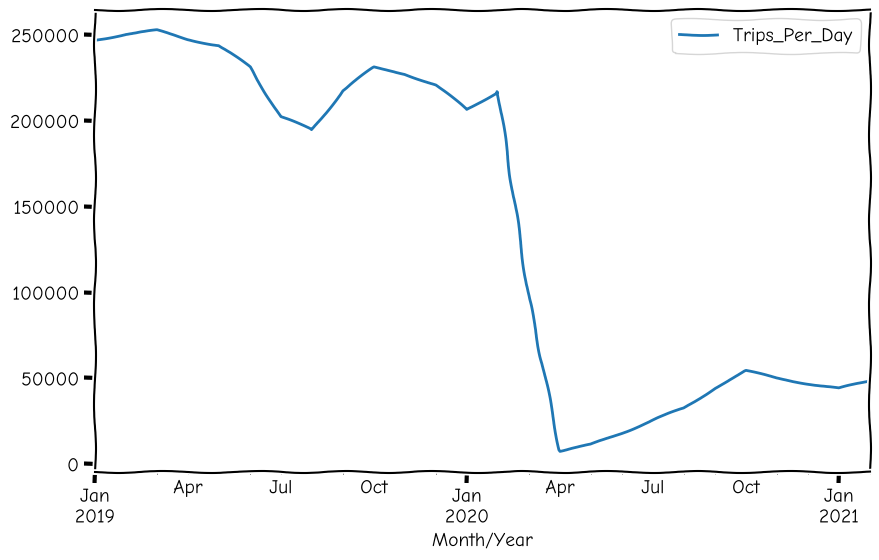

In [32]:
NYCabRaw_yellow["2019-01-01":"2021-02-01"].plot()